In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

__Завдання__:
В домашньому завданні до даного модулю ви потренуєтесь робити тестове завдання для влаштування на роботу.
За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах.
Використайте алгоритми SVM та випадковий ліс з бібліотеки scikit-learn.
Як характеристики можете брати показники з акселерометра, проте щоб покращити результати роботи алгоритмів,
спочатку можна підготувати наш датасет і розрахувати часові ознаки (time domain features). Більше ці характеристики описані в даній статті.
Порівняйте результати роботи обох алгоритмів на різних фічах та різні моделі між собою.

In [2]:
count = 0
dirs = []
dirs_files= {}
for root_dir, cur_dir, files in os.walk(os.getcwd()+'\data'):
    if cur_dir:
        dirs = cur_dir
        continue
    dirs_files.update({root_dir: files})
dir_list = list(dirs_files.keys())
list_of_first = []
for dir_name in dir_list:
    file_path = os.path.join(dir_name, dirs_files[dir_name][1]) 
    list_of_first.append(pd.read_csv(file_path))
[print(elem.split('\\')[-1], f": {len(dirs_files[elem])}") for elem in dirs_files]
dir_list

idle : 1039
running : 3408
stairs : 165
walking : 1850


['C:\\Users\\Max\\Documents\\GitHub\\DS_Homework_05\\data\\idle',
 'C:\\Users\\Max\\Documents\\GitHub\\DS_Homework_05\\data\\running',
 'C:\\Users\\Max\\Documents\\GitHub\\DS_Homework_05\\data\\stairs',
 'C:\\Users\\Max\\Documents\\GitHub\\DS_Homework_05\\data\\walking']

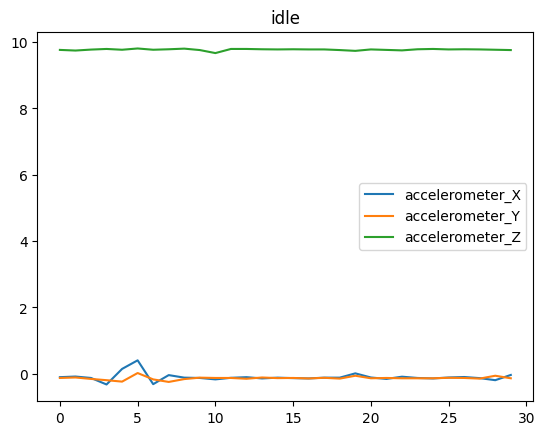

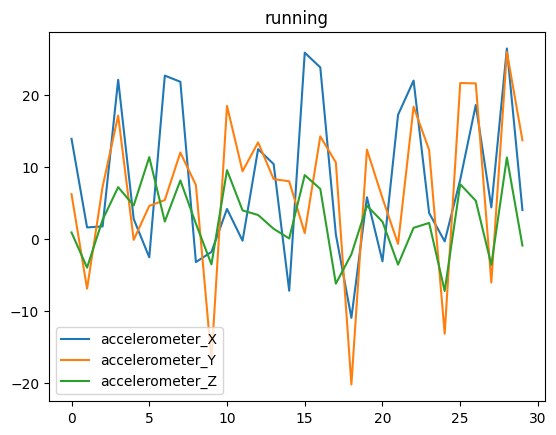

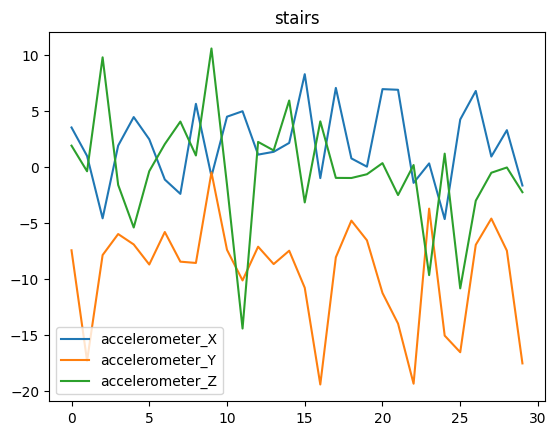

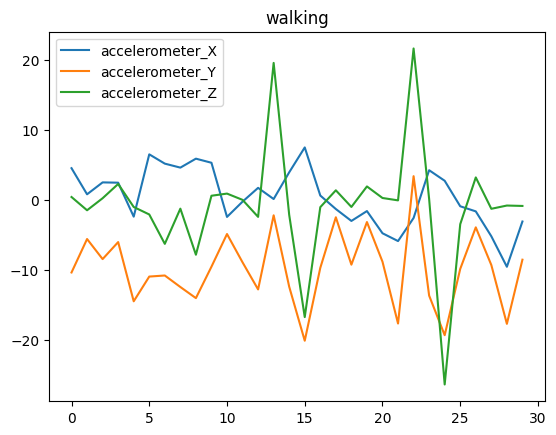

In [3]:
# Samples of each data
for i in range(4):
    plt.plot(list_of_first[i])
    plt.legend(list_of_first[i])
    name = dir_list[i].split('\\')[-1]
    plt.title(f"{name}")
    plt.show()

__Features__: max, min, mean, standard deviation,range maximum and minimum value, skewness, kurtosis, interquartile range.

__Activity: count__:
1. idle [ACTIVITY_ID = 0] : 1039
1. running [ACTIVITY_ID = 1]: 3408
1. stairs [ACTIVITY_ID = 2]: 165
1. walking [ACTIVITY_ID = 3]: 1850

In [49]:
ACTIVITY_ID = 0

i = 0
df_tdf_0 = None
for _ in dirs_files[dir_list[ACTIVITY_ID]]:
    file_path = os.path.join(dir_list[ACTIVITY_ID], dirs_files[dir_list[ACTIVITY_ID]][i]) 
    df_temp = pd.read_csv(file_path)
    df_temp["id"] = i
    res_dict = {
        "max_X": df_temp.groupby("id")["accelerometer_X"].max(),
        "max_Y": df_temp.groupby("id")["accelerometer_Y"].max(),
        "max_Z": df_temp.groupby("id")["accelerometer_Z"].max(),

        "min_X": df_temp.groupby("id")["accelerometer_X"].min(),
        "min_Y": df_temp.groupby("id")["accelerometer_Y"].min(),
        "min_Z": df_temp.groupby("id")["accelerometer_Z"].min(),

        "mean_X": df_temp.groupby("id")["accelerometer_X"].mean(),
        "mean_Y": df_temp.groupby("id")["accelerometer_Y"].mean(),
        "mean_Z": df_temp.groupby("id")["accelerometer_Z"].mean(),

        "std_X": df_temp.groupby("id")["accelerometer_X"].std(),
        "std_Y": df_temp.groupby("id")["accelerometer_Y"].std(),
        "std_Z": df_temp.groupby("id")["accelerometer_Z"].std(),

        "skew_X": df_temp.groupby("id")["accelerometer_X"].skew(),
        "skew_Y": df_temp.groupby("id")["accelerometer_Y"].skew(),
        "skew_Z": df_temp.groupby("id")["accelerometer_Z"].skew(),

        "qntl_25_X": df_temp.groupby("id")["accelerometer_X"].quantile(.25),
        "qntl_25_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.25),
        "qntl_25_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.25),

        "qntl_50_X": df_temp.groupby("id")["accelerometer_X"].quantile(.5),
        "qntl_50_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.5),
        "qntl_50_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.5),

        "qntl_75_X": df_temp.groupby("id")["accelerometer_X"].quantile(.75),
        "qntl_75_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.75),
        "qntl_75_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.75),

        "range_X": (df_temp.groupby("id")["accelerometer_X"].agg(np.ptp)),
        "range_Y": (df_temp.groupby("id")["accelerometer_Y"].agg(np.ptp)),
        "range_Z": (df_temp.groupby("id")["accelerometer_Z"].agg(np.ptp)),

        "kurt_X": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_X"],
        "kurt_Y": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Y"],
        "kurt_Z": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Z"],

        "activity": ACTIVITY_ID,
        }
    df_res = pd.DataFrame(res_dict)
    df_tdf_0 = pd.concat([df_tdf_0, df_res]).reset_index(drop=True)
    i += 1

(1039, 31)

In [50]:
ACTIVITY_ID = 1

i = 0
df_tdf_1 = None
for _ in dirs_files[dir_list[ACTIVITY_ID]]:
    file_path = os.path.join(dir_list[ACTIVITY_ID], dirs_files[dir_list[ACTIVITY_ID]][i]) 
    df_temp = pd.read_csv(file_path)
    df_temp["id"] = i
    res_dict = {
        "max_X": df_temp.groupby("id")["accelerometer_X"].max(),
        "max_Y": df_temp.groupby("id")["accelerometer_Y"].max(),
        "max_Z": df_temp.groupby("id")["accelerometer_Z"].max(),

        "min_X": df_temp.groupby("id")["accelerometer_X"].min(),
        "min_Y": df_temp.groupby("id")["accelerometer_Y"].min(),
        "min_Z": df_temp.groupby("id")["accelerometer_Z"].min(),

        "mean_X": df_temp.groupby("id")["accelerometer_X"].mean(),
        "mean_Y": df_temp.groupby("id")["accelerometer_Y"].mean(),
        "mean_Z": df_temp.groupby("id")["accelerometer_Z"].mean(),

        "std_X": df_temp.groupby("id")["accelerometer_X"].std(),
        "std_Y": df_temp.groupby("id")["accelerometer_Y"].std(),
        "std_Z": df_temp.groupby("id")["accelerometer_Z"].std(),

        "skew_X": df_temp.groupby("id")["accelerometer_X"].skew(),
        "skew_Y": df_temp.groupby("id")["accelerometer_Y"].skew(),
        "skew_Z": df_temp.groupby("id")["accelerometer_Z"].skew(),

        "qntl_25_X": df_temp.groupby("id")["accelerometer_X"].quantile(.25),
        "qntl_25_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.25),
        "qntl_25_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.25),

        "qntl_50_X": df_temp.groupby("id")["accelerometer_X"].quantile(.5),
        "qntl_50_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.5),
        "qntl_50_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.5),

        "qntl_75_X": df_temp.groupby("id")["accelerometer_X"].quantile(.75),
        "qntl_75_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.75),
        "qntl_75_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.75),

        "range_X": (df_temp.groupby("id")["accelerometer_X"].agg(np.ptp)),
        "range_Y": (df_temp.groupby("id")["accelerometer_Y"].agg(np.ptp)),
        "range_Z": (df_temp.groupby("id")["accelerometer_Z"].agg(np.ptp)),

        "kurt_X": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_X"],
        "kurt_Y": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Y"],
        "kurt_Z": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Z"],

        "activity": ACTIVITY_ID,
        }
    df_res = pd.DataFrame(res_dict)
    df_tdf_1 = pd.concat([df_tdf_1, df_res]).reset_index(drop=True)
    i += 1
df_tdf_1.shape

(3408, 31)

In [51]:
ACTIVITY_ID = 2

i = 0
df_tdf_2 = None
for _ in dirs_files[dir_list[ACTIVITY_ID]]:
    file_path = os.path.join(dir_list[ACTIVITY_ID], dirs_files[dir_list[ACTIVITY_ID]][i]) 
    df_temp = pd.read_csv(file_path)
    df_temp["id"] = i
    res_dict = {
        "max_X": df_temp.groupby("id")["accelerometer_X"].max(),
        "max_Y": df_temp.groupby("id")["accelerometer_Y"].max(),
        "max_Z": df_temp.groupby("id")["accelerometer_Z"].max(),

        "min_X": df_temp.groupby("id")["accelerometer_X"].min(),
        "min_Y": df_temp.groupby("id")["accelerometer_Y"].min(),
        "min_Z": df_temp.groupby("id")["accelerometer_Z"].min(),

        "mean_X": df_temp.groupby("id")["accelerometer_X"].mean(),
        "mean_Y": df_temp.groupby("id")["accelerometer_Y"].mean(),
        "mean_Z": df_temp.groupby("id")["accelerometer_Z"].mean(),

        "std_X": df_temp.groupby("id")["accelerometer_X"].std(),
        "std_Y": df_temp.groupby("id")["accelerometer_Y"].std(),
        "std_Z": df_temp.groupby("id")["accelerometer_Z"].std(),

        "skew_X": df_temp.groupby("id")["accelerometer_X"].skew(),
        "skew_Y": df_temp.groupby("id")["accelerometer_Y"].skew(),
        "skew_Z": df_temp.groupby("id")["accelerometer_Z"].skew(),

        "qntl_25_X": df_temp.groupby("id")["accelerometer_X"].quantile(.25),
        "qntl_25_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.25),
        "qntl_25_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.25),

        "qntl_50_X": df_temp.groupby("id")["accelerometer_X"].quantile(.5),
        "qntl_50_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.5),
        "qntl_50_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.5),

        "qntl_75_X": df_temp.groupby("id")["accelerometer_X"].quantile(.75),
        "qntl_75_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.75),
        "qntl_75_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.75),

        "range_X": (df_temp.groupby("id")["accelerometer_X"].agg(np.ptp)),
        "range_Y": (df_temp.groupby("id")["accelerometer_Y"].agg(np.ptp)),
        "range_Z": (df_temp.groupby("id")["accelerometer_Z"].agg(np.ptp)),

        "kurt_X": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_X"],
        "kurt_Y": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Y"],
        "kurt_Z": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Z"],

        "activity": ACTIVITY_ID,
        }
    df_res = pd.DataFrame(res_dict)
    df_tdf_2 = pd.concat([df_tdf_2, df_res]).reset_index(drop=True)
    i += 1
df_tdf_2.shape

(165, 31)

In [52]:
ACTIVITY_ID = 3

i = 0
df_tdf_3 = None
for _ in dirs_files[dir_list[ACTIVITY_ID]]:
    file_path = os.path.join(dir_list[ACTIVITY_ID], dirs_files[dir_list[ACTIVITY_ID]][i]) 
    df_temp = pd.read_csv(file_path)
    df_temp["id"] = i
    res_dict = {
        "max_X": df_temp.groupby("id")["accelerometer_X"].max(),
        "max_Y": df_temp.groupby("id")["accelerometer_Y"].max(),
        "max_Z": df_temp.groupby("id")["accelerometer_Z"].max(),

        "min_X": df_temp.groupby("id")["accelerometer_X"].min(),
        "min_Y": df_temp.groupby("id")["accelerometer_Y"].min(),
        "min_Z": df_temp.groupby("id")["accelerometer_Z"].min(),

        "mean_X": df_temp.groupby("id")["accelerometer_X"].mean(),
        "mean_Y": df_temp.groupby("id")["accelerometer_Y"].mean(),
        "mean_Z": df_temp.groupby("id")["accelerometer_Z"].mean(),

        "std_X": df_temp.groupby("id")["accelerometer_X"].std(),
        "std_Y": df_temp.groupby("id")["accelerometer_Y"].std(),
        "std_Z": df_temp.groupby("id")["accelerometer_Z"].std(),

        "skew_X": df_temp.groupby("id")["accelerometer_X"].skew(),
        "skew_Y": df_temp.groupby("id")["accelerometer_Y"].skew(),
        "skew_Z": df_temp.groupby("id")["accelerometer_Z"].skew(),

        "qntl_25_X": df_temp.groupby("id")["accelerometer_X"].quantile(.25),
        "qntl_25_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.25),
        "qntl_25_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.25),

        "qntl_50_X": df_temp.groupby("id")["accelerometer_X"].quantile(.5),
        "qntl_50_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.5),
        "qntl_50_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.5),

        "qntl_75_X": df_temp.groupby("id")["accelerometer_X"].quantile(.75),
        "qntl_75_Y": df_temp.groupby("id")["accelerometer_Y"].quantile(.75),
        "qntl_75_Z": df_temp.groupby("id")["accelerometer_Z"].quantile(.75),

        "range_X": (df_temp.groupby("id")["accelerometer_X"].agg(np.ptp)),
        "range_Y": (df_temp.groupby("id")["accelerometer_Y"].agg(np.ptp)),
        "range_Z": (df_temp.groupby("id")["accelerometer_Z"].agg(np.ptp)),

        "kurt_X": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_X"],
        "kurt_Y": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Y"],
        "kurt_Z": df_temp.groupby("id").apply(pd.DataFrame.kurt)["accelerometer_Z"],

        "activity": ACTIVITY_ID,
        }
    df_res = pd.DataFrame(res_dict)
    df_tdf_3 = pd.concat([df_tdf_3, df_res]).reset_index(drop=True)
    i += 1
df_tdf_3.shape

(1850, 31)

In [54]:
# Запис обробленого датасету в df_tdf.csv
df_tdf = pd.concat([df_tdf_0, df_tdf_1, df_tdf_2, df_tdf_3]).reset_index(drop=True)
df_tdf.to_csv("df_tdf.csv", index=False)
df_tdf.shape

(6462, 31)

In [4]:
# Зчитування обробленого df_tdf.csv та перемішування
df_tdf = pd.read_csv("df_tdf.csv")
df_tdf = shuffle(df_tdf)

In [5]:
df_tdf.groupby("activity")["activity"].count()

activity
0    1039
1    3408
2     165
3    1850
Name: activity, dtype: int64

In [6]:
# Розподілення на навчальний та тестовий датасети
y = df_tdf["activity"]
X = df_tdf.drop(["activity"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5169, 30), (1293, 30), (5169,), (1293,))

In [19]:
# Спроба навчання методом опорних векторів
clf_svm = SVC(C=1000)
clf_svm.fit(X_train, y_train)

SVC(C=1000)

In [23]:
print(f"Train poly SVC: {f1_score(y_train, clf_svm.predict(X_train), average='macro')}")
print(f"Test poly SVC: {f1_score(y_test, clf_svm.predict(X_test), average='macro')}")

Train poly SVC: 0.9989649987222998
Test poly SVC: 0.9958164642375169


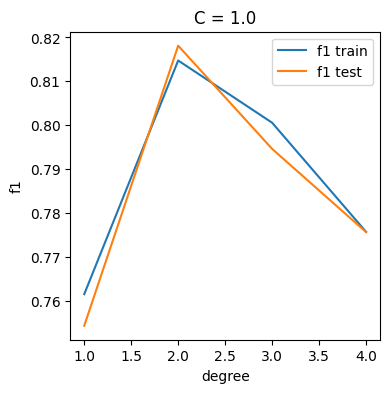

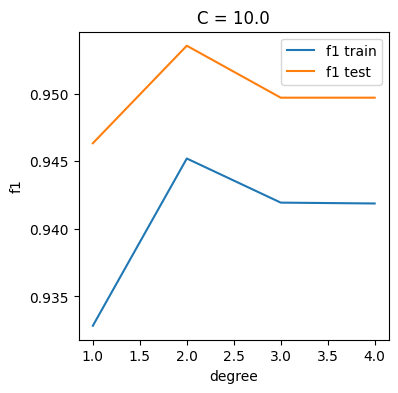

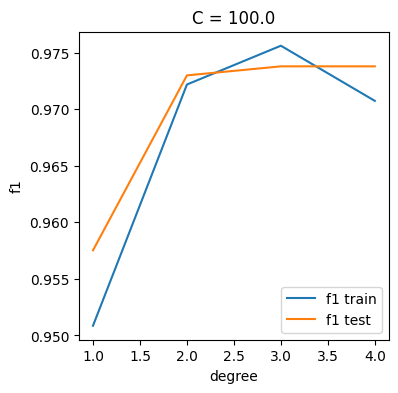

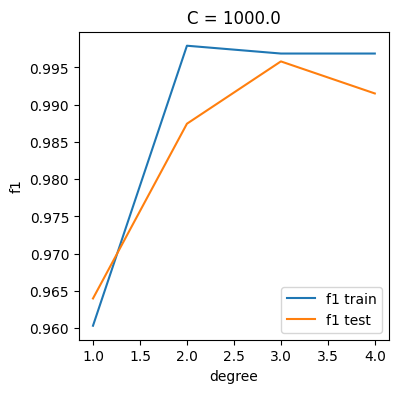

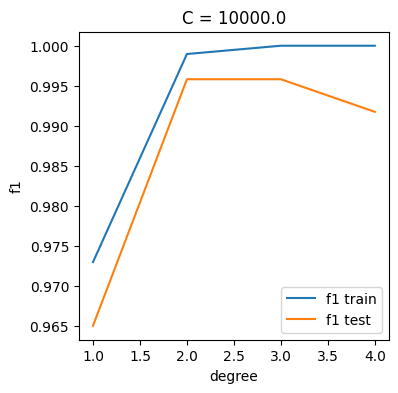

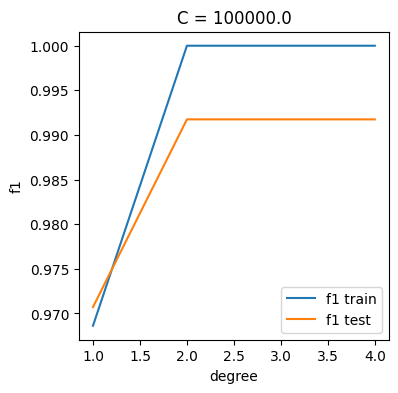

In [49]:
Cs = [1., 10., 100., 1000., 10000., 100000.]
degrees = [1, 2, 3, 4]
# df_poly = pd.DataFrame()
df_temp = pd.DataFrame()
for C in Cs:
    df_poly = pd.DataFrame()
    for degree in degrees:
        svc_poly = SVC(kernel="poly", degree=degree, C=C, probability=True).fit(X_train, y_train)
        res_dict = {
        "f1 train": f1_score(y_train, svc_poly.predict(X_train), average='macro'),
        "f1 test": f1_score(y_test, svc_poly.predict(X_test), average='macro'),
        }
        df_res = pd.DataFrame(res_dict, index=[0])
        df_poly = pd.concat([df_poly, df_res]).reset_index(drop=True)
    plt.figure(figsize=(4, 4))
    plt.plot(np.array(degrees).T, df_poly)
    plt.legend(df_poly)
    plt.xlabel('degree')
    plt.ylabel('f1')
    plt.title(f"C = {C}")
    plt.show()

In [14]:
svc_poly = SVC(kernel="poly", probability=True)
params = {"C": Cs, "degree": degrees}
best_model_poly = GridSearchCV(svc_poly, params, scoring="f1_macro", cv=5, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [21]:
print("Найкращий результат для kernel = 'poly':")
print(f"f1 = {best_model_poly.best_score_.round(3)}, C = {best_model_poly.best_params_['C']}, degree = {best_model_poly.best_params_['degree']}")

Найкращий результат для kernel = 'poly':
f1 = 0.989, C = 10000.0, degree = 3


In [55]:
svc_rbf = SVC(kernel="rbf", C=1000, probability=True).fit(X_train, y_train)
print(f"Train rbf SVC: {f1_score(y_train, clf_svm.predict(X_train), average='macro')}")
print(f"Test rbf SVC: {f1_score(y_test, clf_svm.predict(X_test), average='macro')}")

Train rbf SVC: 0.9989649987222998
Test rbf SVC: 0.9958164642375169


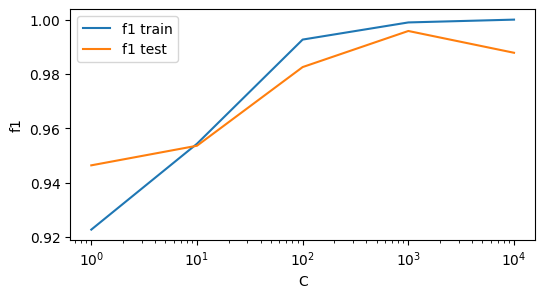

In [56]:
Cs = [1., 10., 100., 1000., 10000.]
df_temp = pd.DataFrame()
df_rbf = pd.DataFrame()
for C in Cs:
    svc_rbf = SVC(kernel="rbf", C=C, probability=True).fit(X_train, y_train)
    res_dict = {
    "f1 train": f1_score(y_train, svc_rbf.predict(X_train), average='macro'),
    "f1 test": f1_score(y_test, svc_rbf.predict(X_test), average='macro'),
    }
    df_res = pd.DataFrame(res_dict, index=[0])
    df_rbf = pd.concat([df_rbf, df_res]).reset_index(drop=True)
plt.figure(figsize=(6,3))
plt.plot(np.array(Cs).T, df_rbf,)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('f1')
plt.legend(df_rbf)
plt.show()

In [66]:
svc_rbf = SVC(kernel="rbf", probability=True)
params = {"C": Cs}
best_model_rbf = GridSearchCV(svc_rbf, params, scoring="f1_macro", cv=3, verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [67]:
print("Найкращий результат для kernel = 'rbf':")
print(f"f1 = {best_model_rbf.best_score_.round(3)}, C = {best_model_rbf.best_params_['C']}")

Найкращий результат для kernel = 'rbf':
f1 = 0.994, C = 1000.0


__Метод опорних векторів__: С=1000 найкраща для "poly" та "rbf". Для "poly" оптимальний параметр degree = 2 або 3.  Міра гармонійного середнього f1>0.99 для тестового зразка.

In [10]:
# Спроба навчання дерева рішень
clf_forest_10 = RandomForestClassifier(n_estimators=10)
clf_forest_10.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [11]:
print(f"Train RandomForest: {f1_score(y_train, clf_forest_10.predict(X_train), average='macro')}")
print(f"Test RandomForest: {f1_score(y_test, clf_forest_10.predict(X_test), average='macro')}")

Train RandomForest: 1.0
Test RandomForest: 0.9958164642375169


In [12]:
df_f1_tree = pd.DataFrame()
df_temp = pd.DataFrame()
for i in range(1, 11):
    clf_forest_temp = RandomForestClassifier(n_estimators=i)
    clf_forest_temp.fit(X_train, y_train)
    res_dict = {
        "f1 train": f1_score(y_train, clf_forest_temp.predict(X_train), average='macro'),
        "f1 test": f1_score(y_test, clf_forest_temp.predict(X_test), average='macro'),
    }
    df_res = pd.DataFrame(res_dict, index=[0])
    df_f1_tree = pd.concat([df_f1_tree, df_res]).reset_index(drop=True)

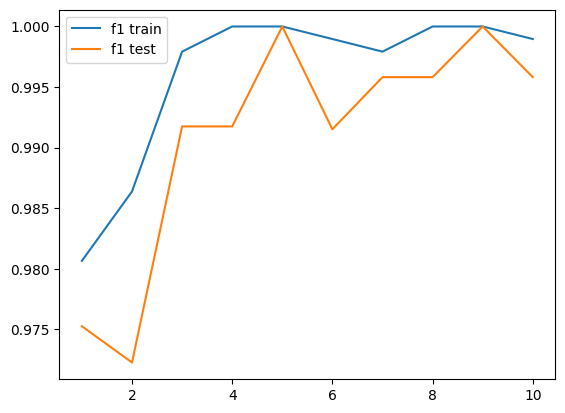

In [41]:
    plt.plot(np.array(range(1, 11)).T, df_f1_tree)
    plt.legend(df_f1_tree)

__Ліс рішень__: При декількох спроб при n>5 міра гармонійного середнього f1>0.98 для тестового зразка.

__Висновок__: Обидва методи дають гарні результати f1_macro > 0.99. Визначили оптимальні параметри С=1000, degree=2, n_estimators=5.